In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Kullback–Leibler divergence
<br/>
\begin{equation}
\text{For discrete probability distributions P and Q }: \\
D_{KL} (P \left |  \right | Q) = \sum{P(x)} \log\left( \frac{P(x)}{Q(x)} \right )
\end{equation}

<br/>
\begin{equation}
\text{For distributions P and Q of a continuous random variable} \\
D_{KL} (P \left |  \right | Q) =  \int_{a}^{b} {p(x)}  \left(\frac{p(x)}{q(x)} \right ) dx
\end{equation}
<br/>

\begin{equation}
\mathrm{kl\_div}(x, y) =
      \begin{cases}
        x \log(x / y) - x + y & x > 0, y > 0 \\
        y & x = 0, y \ge 0 \\
        \infty & \text{otherwise}
      \end{cases}
\end{equation}

In [93]:
# dataset_1 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)
# dataset_2 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)

dataset_1 = stats.norm.rvs(size=100, loc=0, scale=1)
dataset_2 = stats.norm.rvs(size=100, loc=0, scale=1)


<Axes: ylabel='Count'>

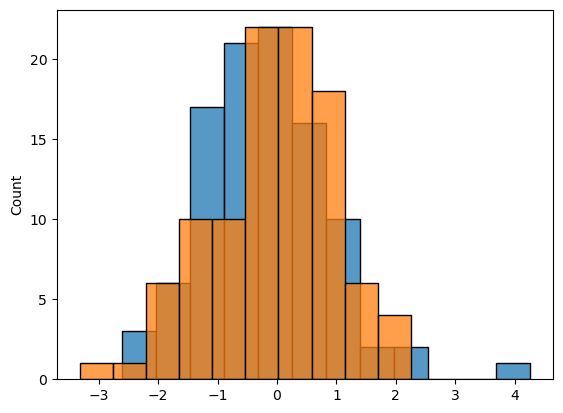

In [94]:
sns.histplot(dataset_1)
sns.histplot(dataset_2)


In [95]:
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [100]:
# Calculate data_1 probabilities as p
p = abs(dataset_1 / np.sum(dataset_1))

# Calculate data_2 probabilities as q
q = abs(dataset_2 / np.sum(dataset_2))

# Calculate KL
# kl = np.sum(p * np.log(p / q))
# kl = np.sum(p * np.log((p / q), out=kl))
# def kl_divergence(p, q):
# return 
kl = np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl

-0.4212462247126292

In [101]:
len(np.log(p, out=p, where=p>0))

100

In [102]:
p

array([-2.50228541, -4.99783393, -2.5839934 , -2.24613071, -2.95680984,
       -3.24098513, -5.22448422, -8.33384223, -4.65379871, -2.91576994,
       -5.78687442, -3.60712644, -4.69610778, -3.94290975, -2.43580408,
       -2.59144843, -5.93461277, -3.51038507, -3.24492866, -2.82658662,
       -2.72717012, -4.43692837, -3.27490727, -2.92445066, -2.97390208,
       -3.00592241, -3.37759972, -3.53441256, -2.85939787, -3.33002266,
       -4.51274175, -3.63153228, -3.70640657, -3.76601851, -4.34223709,
       -4.07790543, -2.30061167, -3.01916005, -2.97624238, -2.34738897,
       -5.91190105, -3.6683344 , -4.78265764, -3.75967505, -2.36765738,
       -5.41563829, -2.8084639 , -2.46486675, -2.89861055, -5.02534228,
       -3.67263994, -3.5245779 , -2.82280473, -2.97885532, -3.70988149,
       -1.57705507, -3.24048421, -3.92745451, -4.53348571, -2.06714177,
       -3.4330101 , -3.61463081, -7.67681678, -4.57582485, -2.29980908,
       -3.16030964, -3.9673619 , -3.17330586, -3.08577116, -3.25

In [103]:
a = np.array([4, 12, 0, 16, 160, 320])
np.log(a)

array([1.38629436, 2.48490665,       -inf, 2.77258872, 5.07517382,
       5.768321  ])

In [105]:
import scipy

scipy.special.kl_div(p, q, out=None)

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf])